# intro to transfer functions

**learning objectives:**
* reinforce the concept of a transfer function
* know that, with a transfer function, we can obtain the process response to any input
* simulate the response of processes to different inputs via a transfer function model, using `Controlz.jl`

documentation for `Controlz.jl` is [here](https://simonensemble.github.io/Controlz.jl/dev/). install the latest version via `]add Controlz#master`.

In [41]:
using Controlz # this *might* take a few min to compile
using PyPlot # for plotting via matplotlib

# (optional) hipster plot theme
PyPlot.matplotlib.style.use(normpath(joinpath(pathof(Controlz), "..", "hipster.mplstyle")))

## the liquid storage system (flow in/out of a tank)

<img src="https://raw.githubusercontent.com/SimonEnsemble/control_theory_demos/master/studios/liq_in_out_tank.png" alt="Smiley face" width=600>

a dynamic model for this process, in deviation form, is (see lecture notes):
\begin{equation}
    A \frac{dh^*}{dt} = q_i^* -\frac{1}{R} h^*
\end{equation}

* **the input** to this process is $q_i^*(t)$
* **the output** of this process is (conceptually, not literally) $h^*(t)$

the transfer function $G(s)$ is (see lecture notes):

\begin{equation}
    G(s) = \frac{H^*(s)}{Q_i^*(s)}=\frac{R}{ARs+1}
\end{equation}

the area $A$ and exit line resistance $R$ are provided in the code cell below.

In [42]:
A = 2.0 # m²
R = 0.5 # min / m². intuitive that we see units of area here: friction of fluid with the *walls* of the pipe!

0.5

#### the steady state values $\bar{q_i}$ and $\bar{h}$

(0) at steady state conditions, the incoming liquid flow rate is $\bar{q_i}=3$ m$^3$/min.
what is the corresponding steady state value of the liquid level, $\bar{h}$? Define it as a variable `h̄` in the code cell below.

In [43]:
q̄ᵢ = 3.0 # m³/min. I got this via `q\bar`, then hit `Tab`. the subscript is via `\_i` then `Tab`

h̄ = q̄ᵢ * R # m

1.5

#### constructing a transfer function in `Controlz.jl`

(1) using `Controlz.jl`, construct the transfer function $G(s)$ as a variable in Julia, `G`. see docs [here](https://simonensemble.github.io/Controlz.jl/dev/tfs/). way #1 is most intutive. use the variables defined above, `A` and `R`, so if we change them later `G` can automatically update.

In [44]:
G = R / (A * R * s + 1)
@show G;

G = 
    0.5
-----------
1.0*s + 1.0


#### poles and zeros of a transfer function in `Controlz.jl`

(2a) on pencil and paper, find the poles and zeros of $G(s)$.
* the **zeros** of $G(s)$ are $\{s: G(s)=0\}$ (the roots of the numerator in the rational function that is $G(s)$)
* the **poles** of $G(s)$ are $\{s: 1/G(s)=0\}$ (the roots of the denominator in the rational function that is $G(s)$)

(2b) visualize the poles and zeros of the transfer function `G` in the complex plane via the function `viz_poles_and_zeros`. see docs [here](https://simonensemble.github.io/Controlz.jl/dev/viz/).
does this correspond to your hand-calculations?

(2c) a (unique) pole $p_k$ in $H^*(s)$ will generate terms in the response $e^{p_kt}$ (see lecture notes on partial fraction expansion). qualitatively, then, what kind of response do you expect to see from an impuse or step input? decaying response modes, or growing? oscillations?

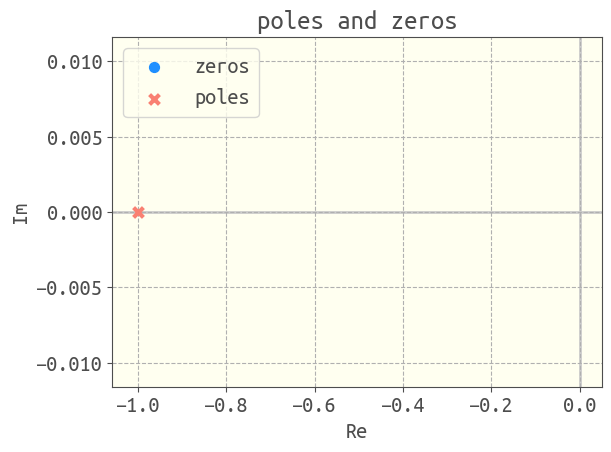

In [45]:
viz_poles_and_zeros(G)

the pole is negative and real. thus, I expect the impulse response to decay with time and not exhibit oscillations. this is because a pole $p$ will give us terms $e^{bt}$ in the response, and here $b$ is negative and real => response is a decaying exponential.

#### gain of a transfer function in `Controlz.jl`

(3a) on pencil and paper, compute the gain of the transfer function $G(s)$.

(3b) see docs [here](https://simonensemble.github.io/Controlz.jl/dev/tfs/#poles,-zeros,-and-zero-frequency-gain-of-a-transfer-function-1) to learn how to compute the zeros, poles, and gain of a transfer function all in one function! does your computed gain equal the one computed by `Controlz.jl`?

In [46]:
z, p, gain = zeros_poles_gain(G)
@show z
@show p
@show gain

z = Float64[]
p = [-1.0]
gain = 0.5


0.5

### simulating the response to different inputs

let us simulate the response $H^*(s)$ of our liquid storage system to different inputs $Q_i^*(s)$.

<img src="https://raw.githubusercontent.com/SimonEnsemble/control_theory_demos/master/studios/liq_storage_sys.png" alt="Smiley face" width=600>

(4) Mathematically, write the output $H^*(s)$ in terms of $G(s)$ and $Q_i^*(s)$. This holds for every input $Q_i^*(s)$.

$H^*(s)=G(s)Q_i^*(s)$

the transfer function representation assumes that the process is initially operating at steady state, so the following initial conditions hold for both scenarios below:
* $q_i(t=0)=\bar{q_i} \implies q_i^*(t=0)=0$.
* $h(t=0)=\bar{h} \implies h^*(t=0)=0$

####  response to step

the process is initially at steady state, then, at $t=0$, suddenly $q_i(t)$ reduces by 2 m$^3$/min and is held there indefinitely. this can be modeled as a step input. 

(5) based on the gain of the transfer function, what will be the new steady state value of $h(t)$?

In [47]:
M = -2.0
h̄ + M * gain

0.5

(5) adapt the example in the `Controlz.jl` documentation [here](https://simonensemble.github.io/Controlz.jl/dev/) to simulate and visualize the step response $h(t)$ for $t\in[0, 10]$ min. you can change the y-label of the figure in `viz_response` by e.g. passing `plot_ylabel=L"$h(t)$"`.

if you see negative values, you are plotting $h^*(t)$, not $h(t)$.

does the new steady state value of $h$, i.e. $h(t\rightarrow \infty)$, conform to your expectations?

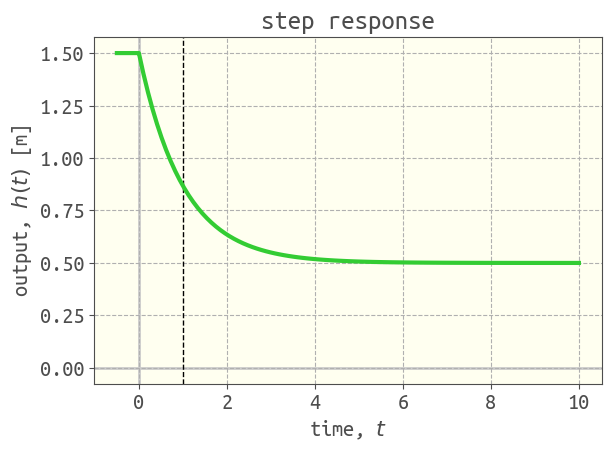

Qi = 
 -2
-----
1.0*s
H = 
     -1.0
---------------
1.0*s^2 + 1.0*s


PyObject <matplotlib.lines.Line2D object at 0x7f76a597a198>

In [48]:
Qi = -2 / s
@show Qi

H = G * Qi
@show H

t, hˣ = simulate(H, 10.0) # 10.0 refers to final time
h = hˣ .+ h̄
viz_response(t, h, plot_title="step response", plot_ylabel=L"output, $h(t)$ [m]")
axvline(x=A*R, color="black", linestyle="--", lw=1)

(6) what are the units of $AR$? plot the quantity $AR$ as a vertical line in your plot above to assess the meaning of it. you can draw on the plot from `viz_response` by putting matplotlib commands after it. 

hint: `axvline(x=5.0, color="black", linestyle="--", lw=1)` will give you a black vertical line at $t=5.0$, dashed and with line width `lw` of 1.

what is the meaning of $AR$?

(7) if you increase $A$, i.e. make the tank wider, what do you expect to happen to the step response?
* how will the final steady state value $y(t\rightarrow \infty)$ change?
* how will the time it takes to reach, say, 50% of, the new steady state $y(t\rightarrow \infty)$ change?

to check your answer, you may change `A` above from `A=2` to `A=10`, but make sure to change it back to `2` for the next part.

####  response to impulse

the process is initially at steady state, then, at $t=0$, a volume of 3 $m^3$ of liquid is suddenly and all at once dumped into the tank. this can be modeled in terms of an impulse input $q_i^*(t)$.

(8) the liquid level will suddenly jump as a result of this sudden dumping of liquid in the tank. via *very* simple arithmetic/geometry, you can find out the initial jump in the liquid level. by how much will the liquid level jump? i.e. what is $h^*(t=0^+)$ in response to this impulse input?

In [49]:
3.0 / A

1.5

(9) what will the final value of the response to the inpulse input be? i.e. what is $h(t\rightarrow \infty)$?

(10) adapt the example in the `Controlz.jl` documentation [here](https://simonensemble.github.io/Controlz.jl/dev/) to simulate and visualize the impulse response $h(t)$ [not $h^*(t)$] for $t\in[0, 10]$ min.

were you correct in Q(7) and Q(8)? re-think if not!

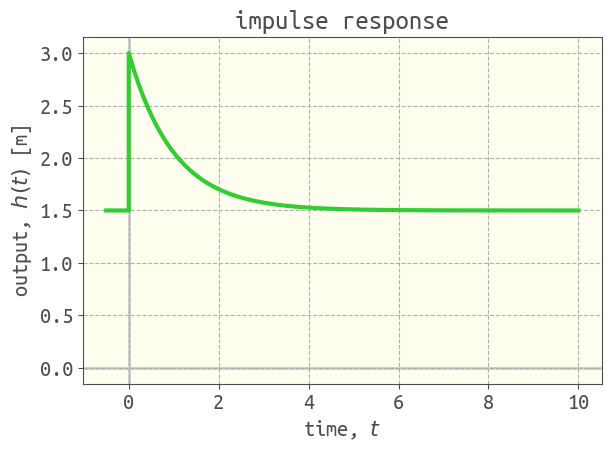

Qi = 3.0
H = 
    1.5
-----------
1.0*s + 1.0


In [50]:
Qi = 3.0
@show Qi

H = G * Qi
@show H

t, hˣ = simulate(H, 10.0)
h = hˣ .+ h̄
viz_response(t, h, plot_title="impulse response", plot_ylabel=L"output, $h(t)$ [m]")